<a href="https://colab.research.google.com/github/parthasarathi1234/DL_assignment_1/blob/main/DL_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import confusion_matrix
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data();
x_train_images, x_validation_images,y_train_labels, y_validation_labels  = train_test_split(x_train,y_train,test_size = 0.1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(x_train_images.shape,x_validation_images.shape,y_train_labels.shape,y_validation_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(54000, 28, 28) (6000, 28, 28) (54000,) (6000,)


#Question1

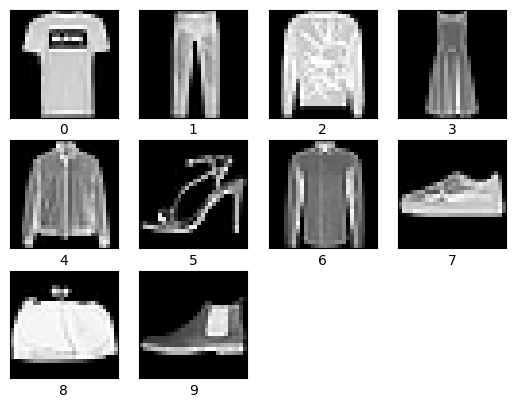

NameError: name 'wandb' is not defined

In [ ]:
n=0
i=0
while(n!=10):
  if(y_train[i]==n):
    plt.subplot(3,4,n+1)
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
    n=n+1
  i=i+1
plt.show()
wandb.log({'plt':plt})

#Question 2


### weights generation   ,   Activation functions

In [3]:
def weight(No_of_layers,neurons,weightInit):
  weights=[]
  bias=[]

  if(weightInit=='random'):
  # input layer
    weights.append(0.01*np.random.randn(neurons,784))
    bias.append(0.01*np.random.randn(neurons,1))

    # Hidden layer
    for i in range(1,No_of_layers):
      weights.append(0.01*np.random.randn(neurons,neurons))
      bias.append(0.01*np.random.randn(neurons,1))

    # output layer
    weights.append(0.01*np.random.randn(10,neurons))
    bias.append(0.01*np.random.randn(10,1))

  elif(weightInit=='xavier'):
    # input layer
    weights.append(0.01*np.random.randn(neurons,784))
    bias.append(np.zeros((neurons,1)))

    # Hidden layer
    for i in range(1,No_of_layers):
      weights.append(0.01*np.random.randn(neurons,neurons))
      bias.append(np.zeros((neurons,1)))

    # output layer
    weights.append(0.01*np.random.randn(10,neurons))
    bias.append(np.zeros((10,1)))

  else:
    weights.append(np.random.randn(neurons,784))
    bias.append(np.random.randn(neurons,1))

    # Hidden layer
    for i in range(1,No_of_layers):
      weights.append(np.random.randn(neurons,neurons))
      bias.append(np.random.randn(neurons,1))

    # output layer
    weights.append(0.01*np.random.randn(10,neurons))
    bias.append(0.01*np.random.randn(10,1))


  return weights,bias



def sigmoid(a):
  z=np.clip(a,-500, 500)
  return 1 / (1 + np.exp(-z))

def tanh(a):
  z=np.clip(a,-50,50)
  return np.tanh(z)

def softmax(a):
  x=1e-6
  return (np.exp(a-max(a))/(sum(np.exp(a-max(a)))+x))

def tanh_derivative(z):
  return 1-np.tanh(z)**2

def relu(Z):
    A = np.maximum(0, Z)
    return A

def relu_derivative(z):
  return np.where(z>0,1,0)

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))



def  feeb_forward(x,layers,act,wei,b):
  pre_activation=[0 for i in range(layers+1)]
  activation=[0 for i in range(layers+1)]
  z=x.reshape(784,1)/255.0
  # activation.append(z)
  # activation[0]=z
  for i in range(layers):
    # print(weights[i].shape,z.shape,b[i].shape)
    if(i==0):
      pre_activation[i]=np.matmul(wei[i],z)+b[i]
      # =a
    else:
      pre_activation[i]=b[i]+np.matmul(wei[i],z)  # pre activation
      # 243/'k'
      # =a
    if(act=="sigmoid"):
      z=sigmoid(pre_activation[i])
    elif(act=="tanh"):
      z=tanh(pre_activation[i])
    elif(act=="relu"):
      z=relu(pre_activation[i])
    else:
      print("wrong activation function")
    activation[i]=z

  pre_activation[layers]=b[layers]+np.matmul(wei[layers],z)
  activation[layers]=np.copy(softmax(pre_activation[layers]))
  return pre_activation,activation,z

def back_propagation(x_t,y_train,z,H,A,layers,W,activation,loss_Fun):
  update_x=x_t.reshape(784,1)/255.0
  dw=[0 for i in range(layers+1)]
  db=[0 for i in range(layers+1)]
  y=np.zeros((10,1))
  y[y_train]=1;
  # loss=-np.subtract(y,z)

  if(loss_Fun=='crossEntropy'):
    loss=-(y-H[layers])
  else:
    loss=(H[layers]-y)*H[layers]*(1-H[layers])

  for k in range(len(W)-1,0,-1):
    # print(loss.shape,H[k].shape,z.shape,y.shape)
    dw[k]=np.matmul(loss,(H[k-1].T))
    # print(k,loss_dw.shape)
    # ]=loss_dw
    # print(k,dw[k].shape)

    # loss_db=loss
    db[k]=np.copy(loss)

    loss_dh=np.matmul((W[k].T),loss)

    if(activation=="tanh"):
      x=tanh_derivative(A[k-1])
    elif(activation=="sigmoid"):
      x=sigmoid_derivative(A[k-1])
    elif(activation=="relu"):
      x=relu_derivative(A[k-1])
    else:
      print("wrong activation function")

    loss=np.multiply(loss_dh,x)
  dw[0]=np.matmul(loss,update_x.T)
  db[0]=np.copy(loss)
  return dw,db

def accuracy(theta_w,theta_b,X,Y,activationfun,layers,loss_Fun):
  # print("accuracy")
  count=0
  loss=0
  # print(X.shape)
  for train_ima,train_labe in zip(X,Y):
    p_act, act, z = feeb_forward(train_ima, layers, activationfun, theta_w, theta_b)
    # print(np.argmax(z),np.argmax(act[layers]),end=",")
    if(np.argmax(act[layers])==train_labe):
      count=count+1

    if(loss_Fun=='crossEntropy'):
      loss+=-np.log(act[layers])[train_labe][0]
    else:
      loss+=(np.argmax(act[layers]-Y.shape[0])**2)
    loss=loss/Y.shape[0]
    acc=(count/Y.shape[0])
  return acc*100,loss*100

def accuracy_confusion(theta_w,theta_b,X,Y,activationfun,layers,loss_Fun,predicted,original):
  # print("accuracy")
  count=0
  loss=0
  # print(X.shape)
  for train_ima,train_labe in zip(X,Y):
    p_act, act, z = feeb_forward(train_ima, layers, activationfun, theta_w, theta_b)
    # print(np.argmax(z),np.argmax(act[layers]),end=",")
    original.append(train_labe)
    predicted.append(np.argmax(act[layers]))
    if(np.argmax(act[layers])==train_labe):
      count=count+1

    if(loss_Fun=='crossEntropy'):
      loss+=-np.log(act[layers])[train_labe][0]
    else:
      loss+=(np.argmax(act[layers]-Y.shape[0])**2)
    loss=loss/Y.shape[0]
    acc=(count/Y.shape[0])
  return acc*100,loss*100

### weights for different neurons in each layer

In [ ]:
  # for i in range(No_of_layers):
  #   neurons.append(int(input()))   # storing no of neurons in each layer

  # weights=[]
  # bias=[]


  # # input layer
  # weights.append(np.random.randn(neurons[0],784))
  # bias.append(np.random.randn(neurons[0],1))

  # # Hidden layer

  # for i in range(1,No_of_layers):
  #   weights.append(np.random.randn(neurons[i],neurons[i-1]))
  #   bias.append(np.random.randn(neurons[i],1))

  # # output layer
  # weights.append(np.random.randn(10,neurons[No_of_layers-1]))
  # bias.append(np.random.randn(10,1))
  # return weights,bias

  # print(len(weights))
  # for i in range(len(weights)):
  #   print(weights[i].shape)

  # for i in range(len(weights)):
  #   print(bias[i].shape)

### accuracy 2

In [ ]:
def accuracyCalc(train_image,train_label,W,B,layers,activationfun,lossFun):
  a,h,z = feeb_forward(train_image,layers,activationfun,W,B)
  res = np.copy(h[layers])
  maxi = res[0]
  label = 0
  for i in range(1,10):
    if(res[i] > maxi ):
      maxi = res[i]
      label = i
  if(lossFun == 'entropy'):
    # print(train_label)
    return label , -np.log(res[train_label]+(1e-5))
  else:
    a_l = np.zeros((10,1))
    a_l[train_label] = 1
    return label, np.sum((h[n]-a_l)**2)



def validationAccuracy(validation_image,validation_label,W,B,layers,activationfun,lossFun):
  a,h,z = feeb_forward(validation_image,layers,activationfun,W,B)
  res = np.copy(h[layers])
  maxi = res[0]
  label = 0
  for i in range(1,10):
    if(res[i] > maxi ):
      maxi = res[i]
      label = i
  if(lossFun == 'entropy'):
    return label,-np.log(res[validation_label]+(1e-5))
  else:
    a_l = np.zeros((10,1))
    a_l[validation_label] = 1
    return label, np.sum((h[n]-a_l)**2)

### kjkfd


In [ ]:
# stochastic_gradient_descent(3,0.01,3,32,"sigmoid","random",0,"crossEntropy")

### stochastic gradient descent

In [39]:
def stochastic_gradient_descent(epochs,eta,layers,neurons,activation_fun,weightInit,weightDecay,loss_Fun):
  W, B = weight(layers,neurons,weightInit)
  for i in range(epochs):
    dw=[[0 for colu in range(row)] for row in range(len(W))]
    db=[[0 for colu in range(row)] for row in range(len(B))]

    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun,loss_Fun)

      for k in range(layers+1):
        W[k]=W[k]-eta*current_dw[k]-(weightDecay*W[k])
        B[k]=B[k]-eta*current_db[k]

    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers,loss_Fun)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers,loss_Fun)
    print("Accuracy")
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})


def momentum_gradient_descent(epochs,eta,layers,neurons,activation_fun,batchSize,weightInit,weightDecay,loss_Fun):
  beta=0.9
  W,B=weight(layers,neurons,weightInit)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    batch=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw, current_db = back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun,loss_Fun)

      for k in range(len(W)):
        dw[k]+=current_dw[k]
        db[k]+=current_db[k]

      if(batch%batchSize==0):
        for k in range(len(W)):
          v_w=beta*pre_v_w[k]+dw[k]
          v_b=beta*pre_v_b[k]+db[k]

          W[k]=W[k]-(eta*v_w) - (weightDecay * W[k])
          B[k]=B[k]-eta*v_b

          pre_v_w[k]=v_w
          pre_v_b[k]=v_b

        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      batch+=1

    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers,loss_Fun)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers,loss_Fun)
    print("Accuracy")
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})


def nesterov_accelerated_gradient_descent(epochs,layers,neurons,eta,activation_fun,batchSize,weightInit,weightDecay,loss_Fun):
  beta=0.9
  W,B=weight(layers,neurons,weightInit)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]

  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    batch=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]

    for k in range(len(W)):
      W[k] = W[k] - beta * pre_v_w[k]
      B[k] = B[k] - beta * pre_v_b[k]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun,loss_Fun)

      for k in range(len(W)):
          dw[k]+=current_dw[k]
          db[k]+=current_db[k]

      if(batch%batchSize==0):
        for k in range(len(W)):
          W[k]=W[k]-eta*dw[k]-(weightDecay*W[k])
          B[k]=B[k]-eta*db[k]
          pre_v_w[k]=eta*dw[k]+beta*pre_v_w[k]
          pre_v_b[k]=eta*db[k]+beta*pre_v_b[k]
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      batch+=1
    acc, loss = accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers,loss_Fun)
    v_acc, v_loss = accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers,loss_Fun)
    print("Accuracy")
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})



def rms_prop(epochs,layers,neurons,eta,activation_fun,batchSize,weightInit,weightDecay,loss_Fun):
  beta=0.5
  W,B=weight(layers,neurons,weightInit)
  eps=1e-4
  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    batch=1
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A, H, Z = feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw, current_db = back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun,loss_Fun)

      for k in range(len(W)):
        dw[k]=dw[k]+current_dw[k]
        db[k]=db[k]+current_db[k]
      if(batch%batchSize==0):
        for k in range(len(W)):
          v_w[k]=beta*v_w[k]+(1-beta)*pow(dw[k],2)
          v_b[k]=beta*v_b[k]+(1-beta)*pow(db[k],2)
          W[k]=W[k]-eta*dw[k]/(np.sqrt(v_w[k])+eps) -(weightDecay*W[k])
          B[k]=B[k]-eta*db[k]/(np.sqrt(v_b[k])+eps)

        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      batch+=1

    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers,loss_Fun)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers,loss_Fun)
    print("Accuracy")
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})
    return W,B



def adam(epochs,eta,activation_fun,layers,neurons,batchSize,weightInit,weightDecay,loss_Fun):
  beta1=0.9
  beta2=0.999
  W,B=weight(layers,neurons,weightInit)
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
    batch=1
    dw=[np.zeros_like(w) for w in W]
    db=[np.zeros_like(w) for w in B]

    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun,loss_Fun)

      for k in range(len(W)):
        dw[k]=dw[k]+current_dw[k]
        db[k]=db[k]+current_db[k]

      if(batch%batchSize==0):
        for k in range(len(W)):
          m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
          m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
          v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
          v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

          m_w_hat=m_w[k]/(1-pow(beta1,k+1))
          m_b_hat=m_b[k]/(1-pow(beta1,k+1))
          v_w_hat=v_w[k]/(1-pow(beta2,k+1))
          v_b_hat=v_b[k]/(1-pow(beta2,k+1))

          W[k]=W[k]-eta*m_w_hat/(np.sqrt(v_w_hat)+eps) - (weightDecay*W[k])
          B[k]=B[k]-eta*m_b_hat/(np.sqrt(v_b_hat)+eps)
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      batch+=1
    acc, loss = accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers,loss_Fun)
    v_acc, v_loss = accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers,loss_Fun)
    print("Accuracy")
    print(acc,loss,v_acc,v_loss)

    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})



def nadam(eta,layers,neurons,epochs,activation_fun,batchSize,weightInit,weightDecay,loss_Fun):
  beta1=0.9
  beta2=0.999
  W,B=weight(layers,neurons,weightInit)
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
    temp=1
    dw=[np.zeros_like(w) for w in W]
    db=[np.zeros_like(w) for w in B]
    for train_ima,train_labe in zip(x_train_images,y_train_labels):
      A,H,Z=feeb_forward(train_ima,layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(train_ima,train_labe,Z,H,A,layers,W,activation_fun,loss_Fun)
      # current_dw.reverse()
      # current_db.reverse()

      for k in range(len(W)):
        dw[k]+=current_dw[k]
        db[k]+=current_db[k]

      if(temp%batchSize==0):
        for k in range(len(W)):
          m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
          m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
          v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
          v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

          m_w_hat=m_w[k]/(1-pow(beta1,i+1))
          m_b_hat=m_b[k]/(1-pow(beta1,i+1))
          v_w_hat=v_w[k]/(1-pow(beta2,i+1))
          v_b_hat=v_b[k]/(1-pow(beta2,i+1))

          W[k]=W[k]-(eta/(np.sqrt(v_w_hat+eps)))*(beta1*m_w_hat+(1-beta1)*dw[k]/(1-beta1**(k+1))) - (weightDecay*W[k])
          B[k]=B[k]-(eta/(np.sqrt(v_b_hat+eps)))*(beta1*m_b_hat+(1-beta1)*db[k]/(1-beta1**(k+1)))
        for xw in dw:
          xw[:]=0
        for xb in db:
          xb[:]=0
      temp+=1
    acc,loss=accuracy(W,B,x_train_images,y_train_labels,activation_fun,layers,loss_Fun)
    v_acc,v_loss=accuracy(W,B,x_validation_images,y_validation_labels,activation_fun,layers,loss_Fun)
    print("Accuracy")
    print(acc,loss,v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc,"Train_Loss" : loss,"Validation_acc" : v_acc,"validation_loss" : v_loss,'epoch':i})

In [ ]:
nesterov_accelerated_gradient_descent(3,3,32,0.01,"tanh",100,"random",0,"crossEntropy")

In [ ]:
rms_prop(3,3,32,0.001,"tanh",100,"random",0,"crossEntropy")

In [ ]:
adam(3,0.01,"sigmoid",4,64,64,"random",0,"crossEntropy")

In [ ]:
nadam(0.001,3,32,3,"tanh",64,"random",0,"crossEntropy")

###all

In [ ]:
# epochs=1
# layers=4
# neurons=32
# learningRate=0.1
# beta=0.9
# batchSize=100
# activationFun="tanh"
# batchSize=100
# stochastic_gradient_descent(epochs,learningRate,layers,neurons,activationFun,"random")
# momentum_gradient_descent(epochs,learningRate,layers,neurons,activationFun,batchSize,"random")
# nesterov_accelerated_gradient_descent(epochs,layers,neurons,learningRate,activationFun,batchSize,"random")
# rms_prop(epochs,layers,neurons,learningRate,activationFun,batchSize,"random")
# adam(epochs,learningRate,activationFun,layers,neurons,batchSize,"random")
# nadam(learningRate,layers,neurons,epochs,activationFun,batchSize,"random")

### Wandb

In [ ]:
# !pip install wandb
!pip install -U wandb

import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project="cs23m035_DL_Assignment1")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs23m035. Use `wandb login --relogin` to force relogin


### confusion matrix

In [5]:
def confusion_Matrix(epochs, layers, neurons, learningRate, optimizer, batchSize, activationFun, weightInit,weightDecay,loss_Fun):
  predicted=[]
  original=[]
  W,B=rms_prop(epochs,layers,neurons,learningRate,activationFun,batchSize,weightInit,weightDecay,loss_Fun)
  acc,loss=accuracy_confusion(W,B,x_train_images,y_train_labels,activationFun,layers,loss_Fun,predicted,original)
  confusion=confusion_matrix(original,predicted)
  plt.figure(figsize=(10,10))
  sn.heatmap(confusion, annot=True, fmt='d',cmap='Oranges',linewidths=2,cbar=True,linecolor='black',
          xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
  plt.xlabel("PREDICTED")
  plt.ylabel("ORIGINAL")
  plt.title('confusion matrix')
  plt.show()

### conncet to wandb

In [ ]:
def main_function(epochs, layers, neurons, learningRate, optimizer, batchSize, activationFun, weightInit,weightDecay,loss_Fun):
    if optimizer == "SGD":
        accuracy=stochastic_gradient_descent(epochs, learningRate, layers, neurons, activationFun, weightInit,weightDecay,loss_Fun)
    elif optimizer == "MGD":
        accuracy=momentum_gradient_descent(epochs, learningRate, layers, neurons, activationFun, batchSize, weightInit,weightDecay,loss_Fun)
    elif optimizer == "NAGD":
        accuracy=nesterov_accelerated_gradient_descent(epochs, layers, neurons, learningRate, activationFun, batchSize, weightInit,weightDecay,loss_Fun)
    elif optimizer == "RMSPROP":
        accuracy=rms_prop(epochs, layers, neurons, learningRate, activationFun, batchSize, weightInit,weightDecay,loss_Fun)
    elif optimizer == "ADAM":
        accuracy=adam(epochs, learningRate, activationFun, layers, neurons, batchSize, weightInit,weightDecay,loss_Fun)
    elif optimizer == "NADAM":
        accuracy=nadam(learningRate, layers, neurons, epochs, activationFun, batchSize, weightInit,weightDecay,loss_Fun)

def main_fun():
    wandb.init(project='cs23m035_DL_Assignment1')
    params = wandb.config
    with wandb.init(project='cs23m035_DL_Assignment1', name='optimizer_func_'+params.optimizer+'_weight_initial_'+params.weightInit+'_activation_func_'+params.activationFun) as run:
        main_function(params.maxIterations,
                      params.layers,
                      params.neurons,
                      params.learningRate,
                      params.optimizer,
                      params.batchSize,
                      params.activationFun,
                      params.weightInit,
                      params.weightDecay,
                      params.loss_Fun)

sweep_params = {
    'method': 'bayes',
    'name': 'Accuracy',
    'metric': {
        'goal': 'maximize',
        'name': 'Validation_acc',
    },
    'parameters': {
        'maxIterations': {'values': [5,10]},
        'layers': {'values': [3,4,5]},
        'neurons': {'values': [32, 64,128]},
        'learningRate': {'values': [1e-3,1e-4]},
        'optimizer': {'values': ['SGD', 'MGD', 'NAGD', 'RMSPROP', 'ADAM', 'NADAM']},
        'batchSize': {'values': [16, 32, 64]},
        'activationFun': {'values': ['tanh','sigmoid','relu']},
        'weightInit': {'values': ['random', 'xavier']},
        'weightDecay': {'values': [0,0.0005,0.5]},
        'loss_Fun':{'values':['crossEntropy','MSE']}

    }
}

sweepId = wandb.sweep(sweep_params, project='cs23m035_DL_Assignment1')
wandb.agent(sweepId, function=main_fun)
